<a href="https://colab.research.google.com/github/josimardtm/MIEL/blob/main/Tutorial05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 5 para el uso de Pandapower en el Curso de Microrredes Eléctricas 2025-1

## Instalar Pandapower con sus dependencias

In [ ]:
# Instalación de Pandapower con todas las dependencias necesarias
!pip install pandapower[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.0/864.0 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.6/87.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 k

## Creación de la red simple

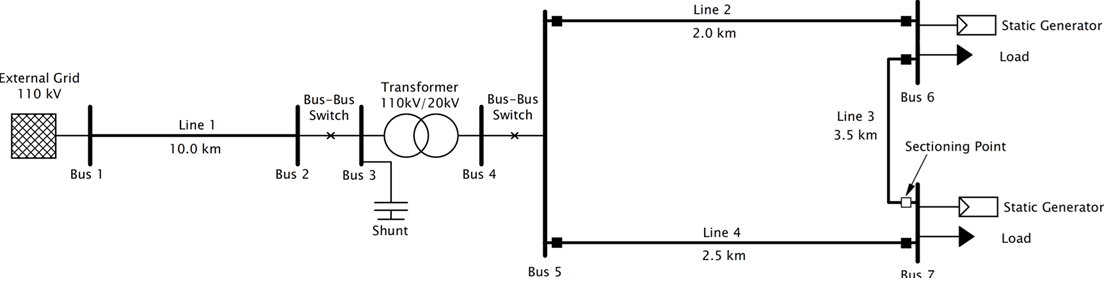


In [ ]:
import pandapower as pp #import pandapower

net = pp.create_empty_network() # crear red vacía

# nodos
bus1 = pp.create_bus(net, name="HV Busbar", vn_kv=110, type="b")
bus2 = pp.create_bus(net, name="HV Busbar 2", vn_kv=110, type="b")
bus3 = pp.create_bus(net, name="HV Transformer Bus", vn_kv=110, type="n")
bus4 = pp.create_bus(net, name="MV Transformer Bus", vn_kv=20, type="n")
bus5 = pp.create_bus(net, name="MV Main Bus", vn_kv=20, type="b")
bus6 = pp.create_bus(net, name="MV Bus 1", vn_kv=20, type="b")
bus7 = pp.create_bus(net, name="MV Bus 2", vn_kv=20, type="b")

pp.create_ext_grid(net, bus1, vm_pu=1.02, va_degree=50) # crear conexión de red externa

trafo1 = pp.create_transformer(net, bus3, bus4, name="110kV/20kV transformer", std_type="25 MVA 110/20 kV") # crear transformador

# líneas
line1 = pp.create_line(net, bus1, bus2, length_km=10, std_type="N2XS(FL)2Y 1x300 RM/35 64/110 kV",  name="Line 1")
line2 = pp.create_line(net, bus5, bus6, length_km=2.0, std_type="NA2XS2Y 1x240 RM/25 12/20 kV", name="Line 2")
line3 = pp.create_line(net, bus6, bus7, length_km=3.5, std_type="48-AL1/8-ST1A 20.0", name="Line 3")
line4 = pp.create_line(net, bus7, bus5, length_km=2.5, std_type="NA2XS2Y 1x240 RM/25 12/20 kV", name="Line 4")

# interruptores
sw1 = pp.create_switch(net, bus2, bus3, et="b", type="CB", closed=True)
sw2 = pp.create_switch(net, bus4, bus5, et="b", type="CB", closed=True)
sw3 = pp.create_switch(net, bus5, line2, et="l", type="LBS", closed=True)
sw4 = pp.create_switch(net, bus6, line2, et="l", type="LBS", closed=True)
sw5 = pp.create_switch(net, bus6, line3, et="l", type="LBS", closed=True)
sw6 = pp.create_switch(net, bus7, line3, et="l", type="LBS", closed=False)
sw7 = pp.create_switch(net, bus7, line4, et="l", type="LBS", closed=True)
sw8 = pp.create_switch(net, bus5, line4, et="l", type="LBS", closed=True)

# cargas
pp.create_load(net, bus6, p_mw=4, q_mvar=2, scaling=0.6, name="load_6")
pp.create_load(net, bus7, p_mw=4, q_mvar=2, const_z_percent=30, const_i_percent=20, name="load_7")

# generadores
pp.create_sgen(net, bus6, p_mw=2, q_mvar=-0.5, name="pv_6") # generación estática
pp.create_sgen(net, bus7, p_mw=2, q_mvar=-0.5, name="pv_7") # generación estática
#pp.create_gen(net, bus6, p_mw=6, max_q_mvar=3, min_q_mvar=-3, vm_pu=1.03, name="generator")
#pp.create_shunt(net, bus3, q_mvar=-0.96, p_mw=0, name='Shunt')

print(net)

This pandapower network includes the following parameter tables:
   - bus (7 elements)
   - load (2 elements)
   - sgen (2 elements)
   - switch (8 elements)
   - ext_grid (1 element)
   - line (4 elements)
   - trafo (1 element)


In [ ]:
pp.runpp(net)
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.020000,50.000000,-2.422393,1.549716
1,1.019731,49.987665,0.000000,0.000000
2,1.019731,49.987665,0.000000,0.000000
3,0.999935,-100.625162,0.000000,0.000000
4,0.999935,-100.625162,0.000000,0.000000
5,0.998761,-100.580000,0.400000,1.700000
6,0.996691,-100.598215,1.989425,2.494712


In [ ]:
import pandas as pd
import numpy as np

# Crear un DataFrame con 8 columnas de números aleatorios con distribución uniforme
num_rows = 240  # Número de filas
num_columns = 4  # Número de columnas

# Generar los datos aleatorios
loads = np.random.uniform(low=0.2, high=1.2, size=(num_rows, num_columns))

# Crear el DataFrame
loads_df = pd.DataFrame(loads, columns=[f"Column_{i+1}" for i in range(num_columns)])

loads_df.head()



,Column_1,Column_2,Column_3,Column_4
0,0.767858,0.288852,0.289154,0.931299
1,1.087451,0.747847,0.857044,0.832302
2,0.383428,0.887588,0.618489,0.390175
3,0.628903,0.353740,0.367991,1.166877
4,1.076113,0.739538,0.531699,0.699750


## Crear perfil de datos aleatorios para la carga y calcular P_G_max

In [ ]:
P6=net.load.loc[net.load["name"] == "load_6", "p_mw"].values[0]
Q6=net.load.loc[net.load["name"] == "load_6", "q_mvar"].values[0]
P7=net.load.loc[net.load["name"] == "load_7", "p_mw"].values[0]
Q7=net.load.loc[net.load["name"] == "load_7", "q_mvar"].values[0]

# Factores por los que se multiplicará cada columna
multipliers = np.array([P6, Q6, P7, Q7])

# Multiplicar cada columna por su respectivo factor
scaled_loads = loads * multipliers

# Parámetros iniciales
S_max = np.sqrt(3)*0.421*20  # Potencia aparente máxima en MVA

# Aplicar la ecuación para cada fila
P_G_max_6 = np.sqrt(S_max**2 - scaled_loads[:,0]**2) + scaled_loads[:, 1]
P_G_max_7 = np.sqrt(S_max**2 - scaled_loads[:,2]**2) + scaled_loads[:, 3]


In [ ]:
import plotly.graph_objects as go
# Create a DataFrame
data = {
    "Time": np.arange(len(P_G_max_6)),  # Index as Time
    "P_G_max_6": P_G_max_6,
    "P_G_max_7": P_G_max_7,
}
df = pd.DataFrame(data)

# Visualization with Plotly
fig = go.Figure()

# Add P_G_max to the graph
fig.add_trace(go.Scatter(x=df["Time"], y=df["P_G_max_6"], mode='lines', name='P_G_max_6'))

# Add the alternative vector to the graph
fig.add_trace(go.Scatter(x=df["Time"], y=df["P_G_max_7"], mode='lines', name='P_G_max_7'))

# Customize the layout
fig.update_layout(
    title="Comparación de P_G_max_6 y P_G_max_7",
    xaxis_title="Time (Index)",
    yaxis_title="Power (MW)",
    legend=dict(title="Legend"),
    template="plotly",
    height=500,
    width=800
)

# Show the plot
fig.show()

In [ ]:
# Create boxplots for each data series
fig = go.Figure()

fig.add_trace(
    go.Box(
        y=P_G_max_6,
        name="P_G_max_6",
        boxpoints="all",  # Show all points
        marker_color="blue",
        boxmean="sd",  # Show mean and standard deviation
    )
)

fig.add_trace(
    go.Box(
        y=P_G_max_7,
        name="P_G_max_7",
        boxpoints="all",  # Show all points
        marker_color="orange",
        boxmean="sd",  # Show mean and standard deviation
    )
)

# Customize layout
fig.update_layout(
    title="Boxplots for P_G_max and P_G_max_2",
    yaxis_title="Power (MW)",
    xaxis_title="Category",
    template="plotly",
    height=500,
    width=800,
)

# Display the plot
fig.show()

In [ ]:
P6=net.load.loc[net.load["name"] == "load_6", "p_mw"]
Q6=net.load.loc[net.load["name"] == "load_6", "q_mvar"]
P7=net.load.loc[net.load["name"] == "load_7", "p_mw"]
Q7=net.load.loc[net.load["name"] == "load_7", "q_mvar"]

voltages=[]
buses = [bus1, bus2, bus3, bus4, bus5, bus6, bus7]
# Initialize a DataFrame to store voltage results
voltage_results = pd.DataFrame(columns=[f"Bus {i}" for i in range(1, 8)])

for index,row in loads_df.iterrows():
  net.load.loc[net.load["name"] == "load_6", "p_mw"] = P6*row["Column_1"]
  net.load.loc[net.load["name"] == "load_6", "q_mvar"] = Q6*row["Column_2"]

  net.load.loc[net.load["name"] == "load_7", "p_mw"] = P7*row["Column_3"]
  net.load.loc[net.load["name"] == "load_7", "q:mvar"] = Q7*row["Column_4"]

  pp.runpp(net)
  voltages.append(net.res_bus.loc[bus5, "vm_pu"])
  # Store voltage magnitudes for all buses in the DataFrame
  vs = [net.res_bus.loc[bus, "vm_pu"] for bus in buses]
  voltage_results.loc[len(voltage_results)] = vs



In [ ]:
import plotly.express as px
# Add a time index for the x-axis (optional)
voltage_results.index.name = "Time Step"

# Visualization using Plotly
fig = px.line(
    voltage_results,
    labels={"value": "Voltage (p.u.)", "variable": "Bus", "index": "Time Step"},
    title="Voltage Profiles of Buses Over Time"
)
fig.update_layout(legend_title="Bus Number")
fig.show()